# Simple image operations on a movie

Aim:

    * Record a video
    * Process all frames to make sure that:
        * Overall brightness is the same
        * Color channels have the same average intensity

# Creating a visualisation

In [1]:
%pylab inline
% gui qt

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pyqtgraph as pg
import imageio
import time
show_now = pg.QtGui.QApplication.processEvents

In [3]:
imv = pg.ImageView(view=pg.PlotItem())
imv.show()

# Record a video!

In [4]:
reader = imageio.get_reader('<video0>')

In [5]:
num_frames = 30
# collect one frame so we know what the data will look like
one_frame = reader.get_next_data()
print('Frame size: ', one_frame.shape)
# make 100 frames with this shape
movie = np.zeros((num_frames,)+one_frame.shape)
for i in range(num_frames):
    movie[i] = reader.get_next_data()
    time.sleep(1/20)
    imv.setImage(rot90(movie[i]))
    show_now()

# save the movie
imageio.mimsave('movie.mp4', movie.astype(np.uint8))


Frame size:  (480, 640, 3)


# Show the recorded movie
<video controls src="movie.mp4" />


In [6]:
imv.setImage(rot90(movie, axes=(1,2)))

# Compute the mean intensities and equalize the average intensities of all color channels 

In [7]:
movie.shape

(30, 480, 640, 3)

Text(0.5,0,'frame number')

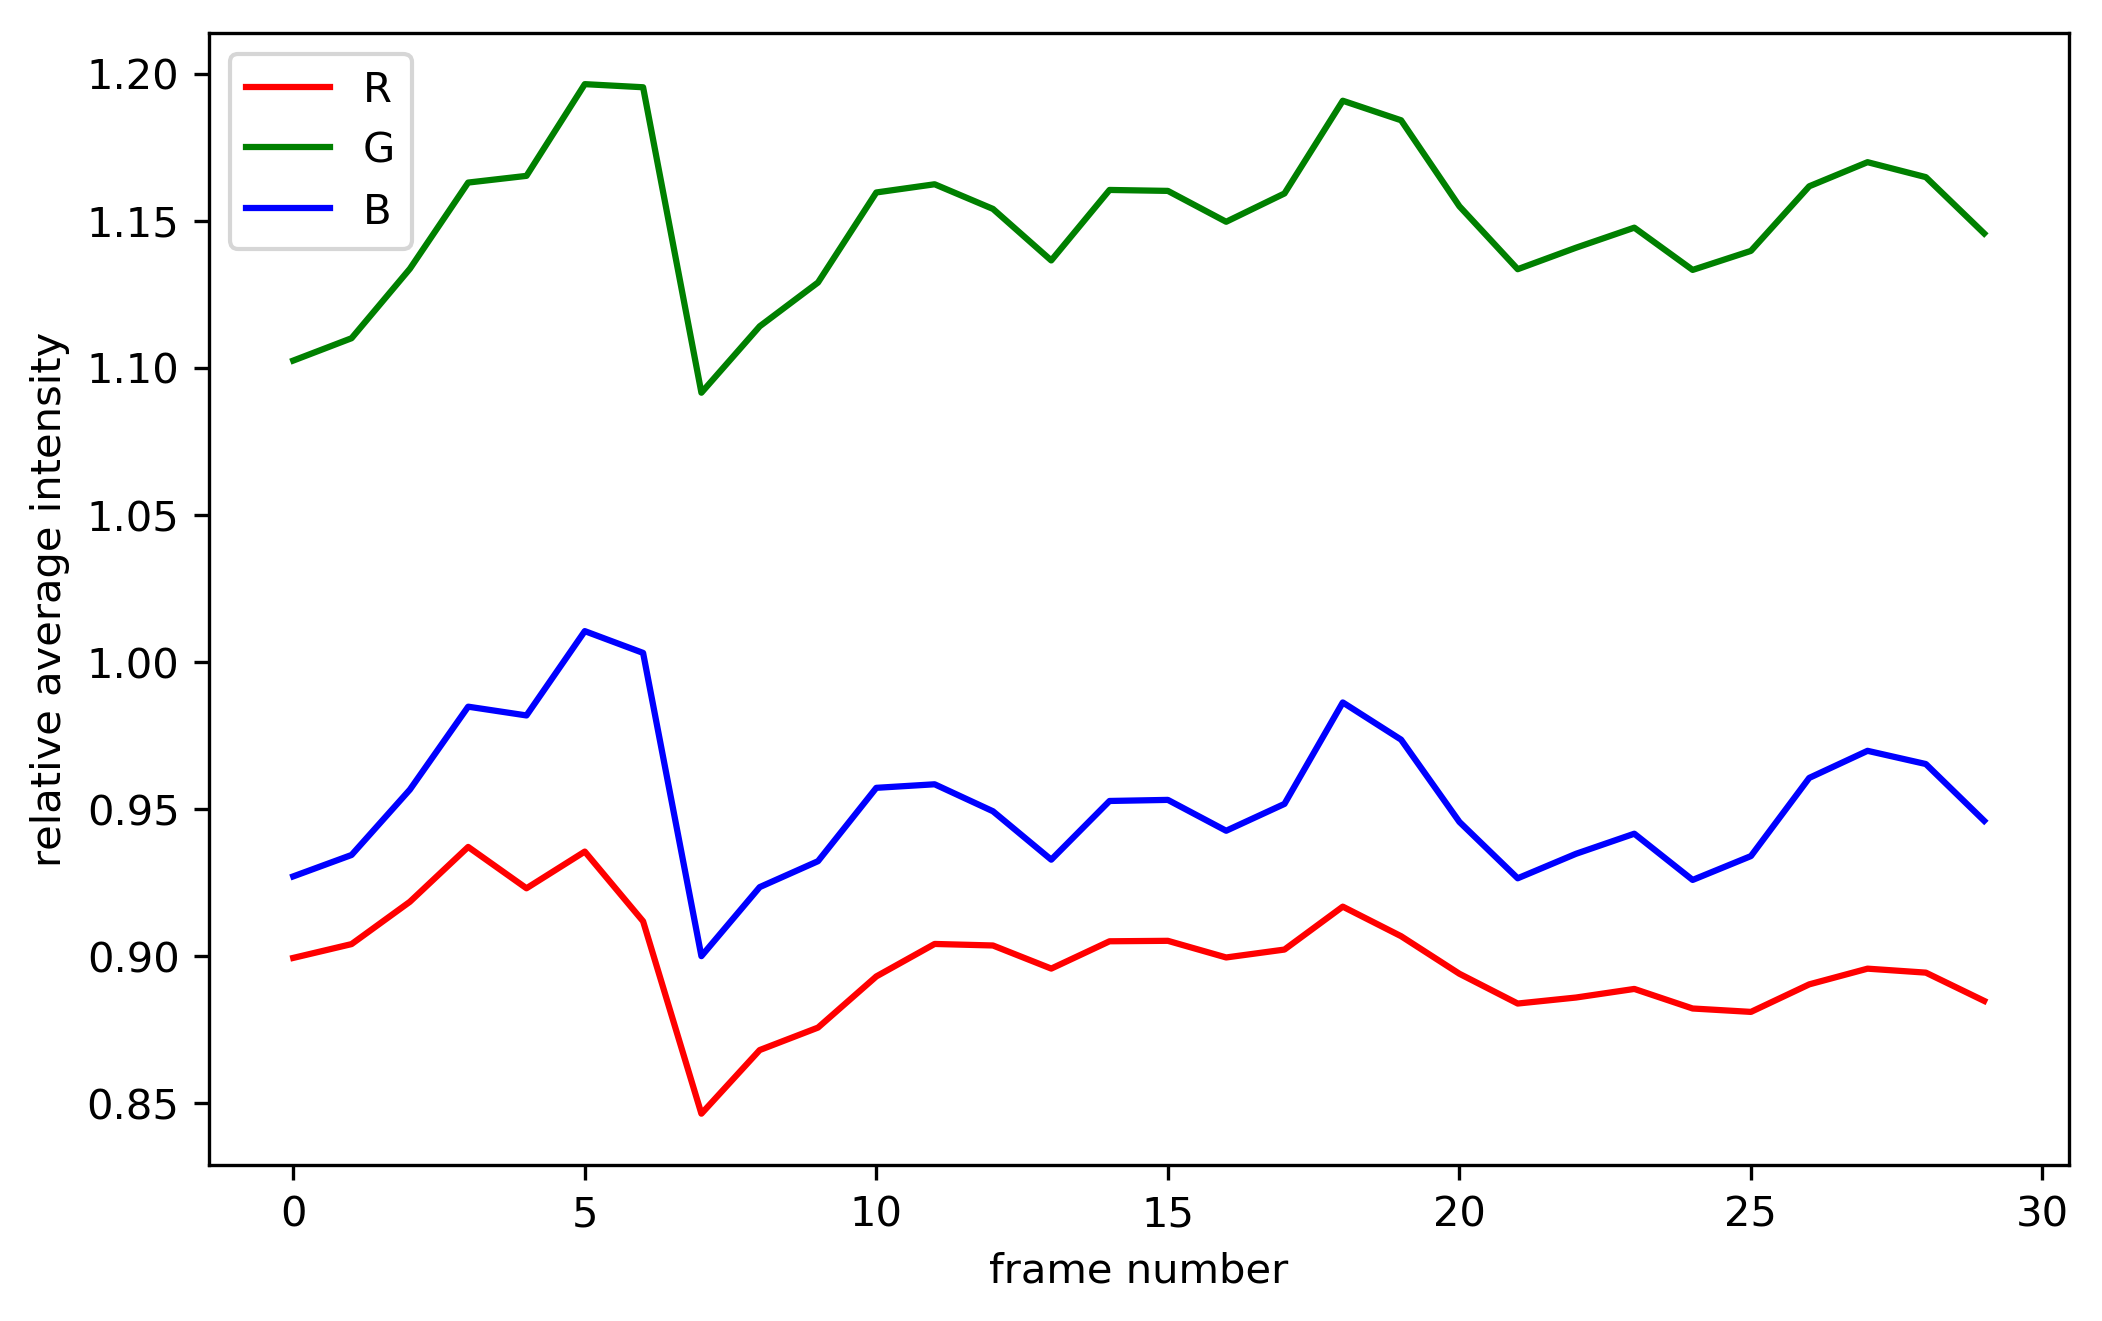

In [8]:
# compute the mean intensity of every frame
mean_intensity = movie.mean((1,2))
# set the average to one
mean_intensity /= np.mean(mean_intensity)

# plot the relative intensities
colors = ['R', 'G', 'B']
figure(dpi=300, figsize=(8,5))
for i in range(3):
    plot(mean_intensity.T[i], label=colors[i], color=colors[i])
legend()
ylabel('relative average intensity')
xlabel('frame number')


In [9]:
# print the first ten relative intensities
mean_intensity[:10]

array([[0.89933391, 1.1024097 , 0.92704925],
       [0.90403026, 1.11000808, 0.93432916],
       [0.91841563, 1.13361026, 0.95654009],
       [0.93706206, 1.16292827, 0.98474721],
       [0.92300697, 1.16520631, 0.9817653 ],
       [0.93548213, 1.19638759, 1.01043157],
       [0.9117836 , 1.19532785, 1.0030223 ],
       [0.84637377, 1.09148967, 0.89993514],
       [0.86800949, 1.11406286, 0.92340225],
       [0.87564581, 1.12896115, 0.93222121]])

In [10]:
movie.shape

(30, 480, 640, 3)

In [ ]:
np.newaxis

In [11]:
# Create a new movie with the same mean intensities for all channels
new_movie = movie.astype(float) / mean_intensity[:,None,None,:]
# some pixels might be too bright now, so set anything above 255 to 255
imv.setImage(new_movie>255)
new_movie[new_movie>255.] = 255
imageio.mimwrite('equalized_movie.mp4', new_movie.astype(np.uint8))

# New movie

<video controls src="equalized_movie.mp4">

# Difference frame-by-frame

In [16]:
gray_movie = np.mean(new_movie, axis=(-1))

In [23]:
imv.setImage(np.diff(rot90(gray_movie, axes=(1,2)),axis=0))

In [1]:
from ipywidgets import interact

In [2]:
@interact
def printit(x=10):
    print(x)
    

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…